## COVID-19 Data Analysis Project

The project integrates global COVID-19 data with the World Happiness Report to examine if socio-economic and well-being factors (e.g., GDP, life expectancy, and social support) are in line with improved COVID-19 outcomes.

**Datasets Used:**
- COVID-19 dataset: Daily confirmed, deaths, recoveries by country.
- World Happiness Report: Happiness scores, GDP, social support, health, freedom, etc.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

covid_df = pd.read_csv("COVID-19 dataset.csv") 
happiness_df = pd.read_csv("worldwide_happiness_report.csv")  


In [55]:
covid_df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,29157,598,8841,19718,324,17,77,2.05,30.32,6.76,25527,3630,14.22,Eastern Mediterranean
1,Albania,1995,44,1159,792,33,0,25,2.21,58.10,3.80,1590,405,25.47,Europe
2,Algeria,11920,852,8559,2509,149,7,137,7.15,71.80,9.95,11031,889,8.06,Africa
3,Andorra,855,52,796,7,0,0,4,6.08,93.10,6.53,853,2,0.23,Europe
4,Angola,186,10,77,99,3,1,0,5.38,41.40,12.99,142,44,30.99,Africa


In [57]:

covid_df.dropna(subset=["Country/Region", "Recovered"], inplace=True)

covid_summary = covid_df.groupby("Country/Region")[["Confirmed", "Deaths", "Recovered"]].sum().reset_index()
covid_summary["Death Rate"] = covid_summary["Deaths"] / covid_summary["Confirmed"]
covid_summary["Recovery Rate"] = covid_summary["Recovered"] / covid_summary["Confirmed"]

covid_summary.head()


,Country/Region,Confirmed,Deaths,Recovered,Death Rate,Recovery Rate
0,Afghanistan,29157,598,8841,0.020510,0.303220
1,Albania,1995,44,1159,0.022055,0.580952
2,Algeria,11920,852,8559,0.071477,0.718037
3,Andorra,855,52,796,0.060819,0.930994
4,Angola,186,10,77,0.053763,0.413978


In [59]:
happiness_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [67]:
happiness_df.rename(columns={
    "Country or region": "Country",
    "Score": "Happiness Score",
    "GDP per capita": "GDP per Capita",
    "Healthy life expectancy": "Life Expectancy",
    "Social support": "Social Support"
}, inplace=True)

happiness_df = happiness_df[[
    "Country", "Happiness Score", "GDP per Capita", "Social Support", "Life Expectancy"
]]

happiness_df.head()


,Country,Happiness Score,GDP per Capita,Social Support,Life Expectancy
0,Finland,7.769,1.340,1.587,0.986
1,Denmark,7.600,1.383,1.573,0.996
2,Norway,7.554,1.488,1.582,1.028
3,Iceland,7.494,1.380,1.624,1.026
4,Netherlands,7.488,1.396,1.522,0.999


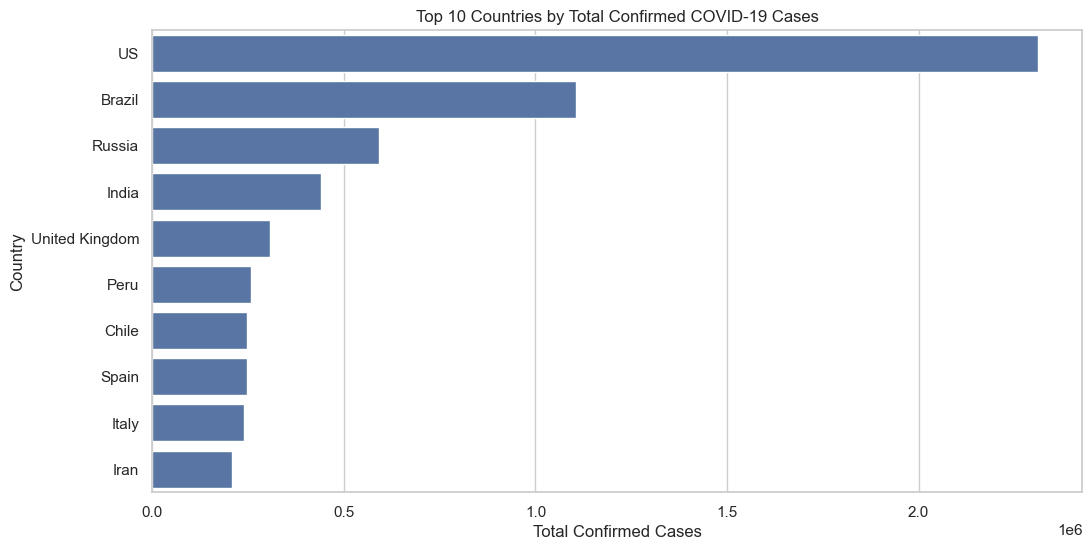

In [71]:

top_cases = covid_summary.sort_values("Confirmed", ascending=False).head(10)

plt.figure()
sns.barplot(data=top_cases, x="Confirmed", y="Country/Region")
plt.title("Top 10 Countries by Total Confirmed COVID-19 Cases")
plt.xlabel("Total Confirmed Cases")
plt.ylabel("Country")
plt.show()


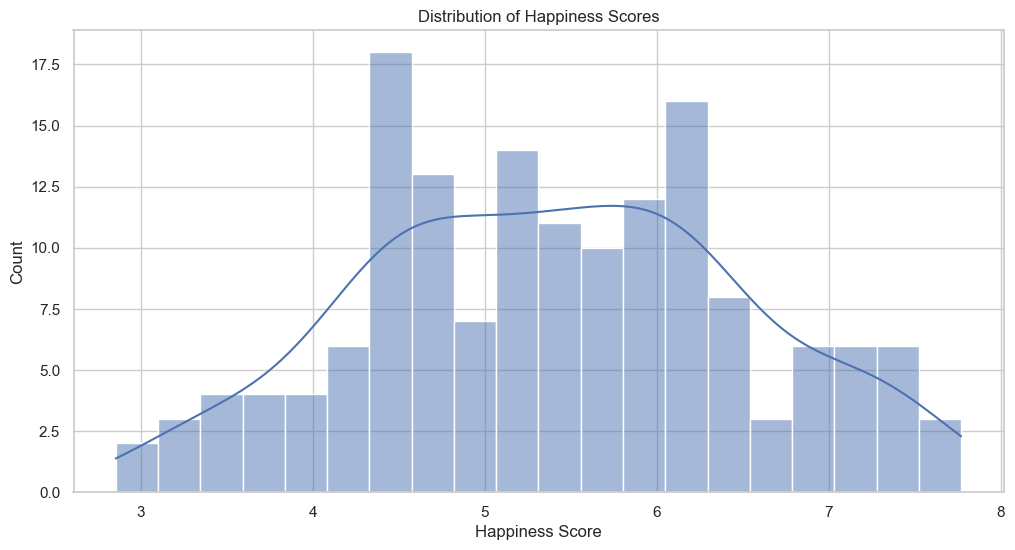

In [73]:
sns.histplot(happiness_df["Happiness Score"], bins=20, kde=True)
plt.title("Distribution of Happiness Scores")
plt.xlabel("Happiness Score")
plt.show()


In [75]:

covid_summary.rename(columns={"Country/Region": "Country"}, inplace=True)

merged_df = pd.merge(covid_summary, happiness_df, on="Country", how="inner")

merged_df.head()


,Country,Confirmed,Deaths,Recovered,Death Rate,Recovery Rate,Happiness Score,GDP per Capita,Social Support,Life Expectancy
0,Afghanistan,29157,598,8841,0.020510,0.303220,3.203,0.350,0.517,0.361
1,Albania,1995,44,1159,0.022055,0.580952,4.719,0.947,0.848,0.874
2,Algeria,11920,852,8559,0.071477,0.718037,5.211,1.002,1.160,0.785
3,Argentina,44931,1043,13153,0.023213,0.292738,6.086,1.092,1.432,0.881
4,Armenia,20588,360,9131,0.017486,0.443511,4.559,0.850,1.055,0.815


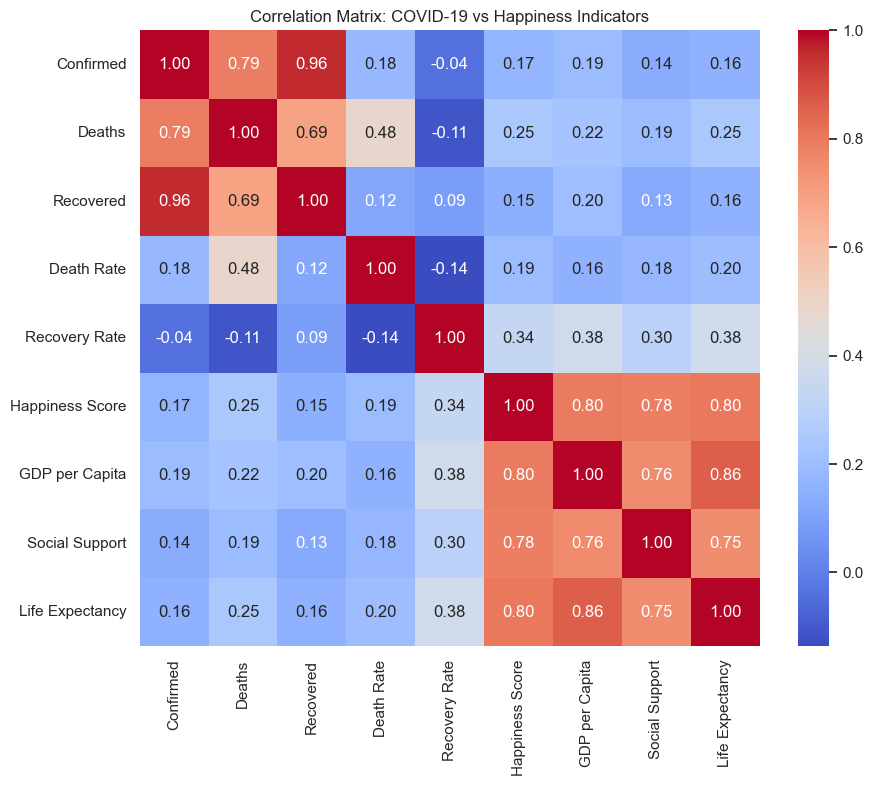

In [77]:
corr = merged_df[[
    "Confirmed", "Deaths", "Recovered", "Death Rate", "Recovery Rate",
    "Happiness Score", "GDP per Capita", "Social Support", "Life Expectancy"
]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: COVID-19 vs Happiness Indicators")
plt.show()


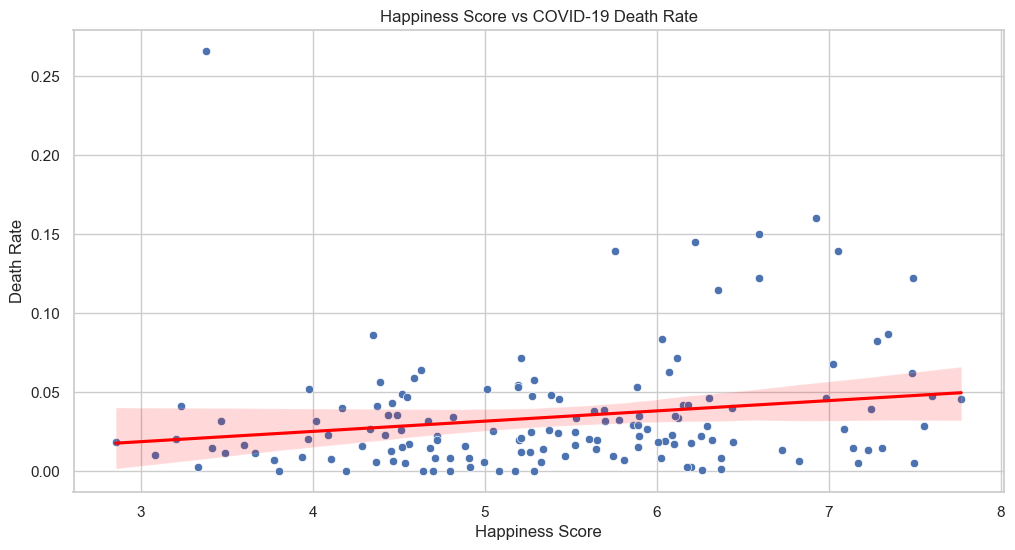

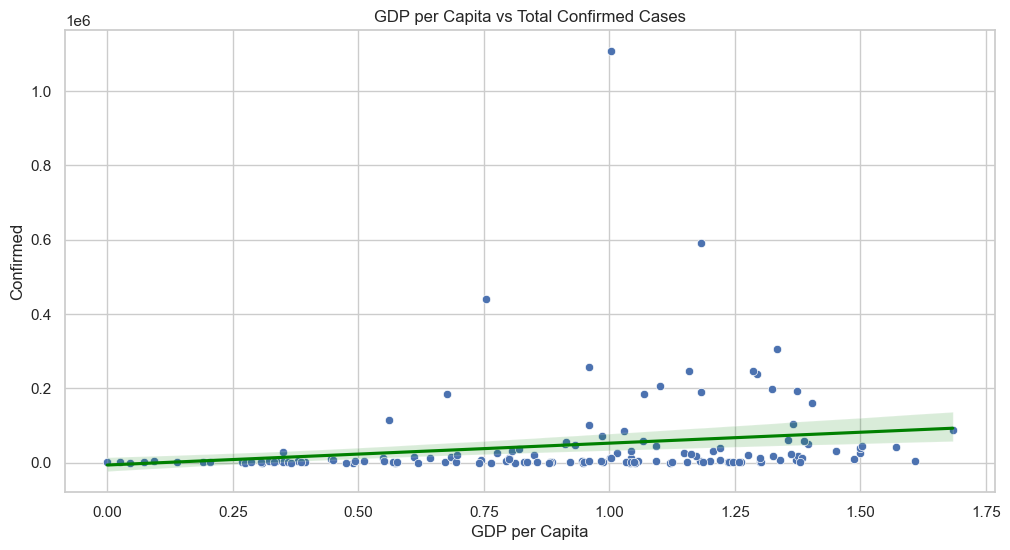

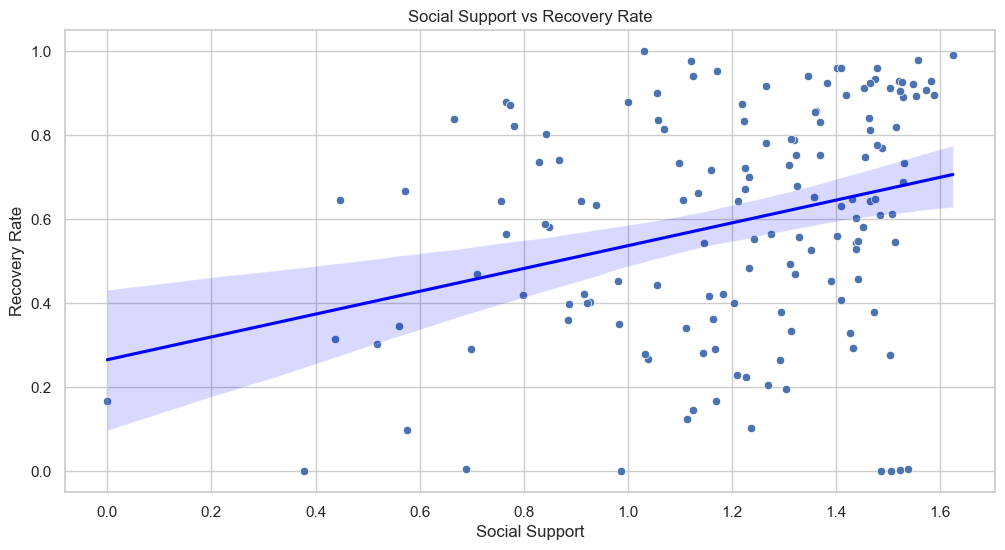

In [79]:
# Happiness Score vs Death Rate
sns.scatterplot(data=merged_df, x="Happiness Score", y="Death Rate")
sns.regplot(data=merged_df, x="Happiness Score", y="Death Rate", scatter=False, color='red')
plt.title("Happiness Score vs COVID-19 Death Rate")
plt.show()

# GDP vs Confirmed Cases
sns.scatterplot(data=merged_df, x="GDP per Capita", y="Confirmed")
sns.regplot(data=merged_df, x="GDP per Capita", y="Confirmed", scatter=False, color='green')
plt.title("GDP per Capita vs Total Confirmed Cases")
plt.show()

# Social Support vs Recovery Rate
sns.scatterplot(data=merged_df, x="Social Support", y="Recovery Rate")
sns.regplot(data=merged_df, x="Social Support", y="Recovery Rate", scatter=False, color='blue')
plt.title("Social Support vs Recovery Rate")
plt.show()


## Key Insights

- Nations with greater **GDP per Capita** registered **greater COVID-19 case numbers**, possibly because they had more developed testing and reporting infrastructure.
- There was a **negative correlation** found between **Happiness Score and Death Rate**, which indicated that happier countries could have experienced improved pandemic results.
- High **social support** is positively associated with **greater recovery rates**.
- The general trend between happiness measures and COVID-19 results is moderate, although a number of important indicators (such as Life Expectancy and GDP) reflect significant trends.


## Conclusion

This study integrated COVID-19 data with happiness data to examine socio-economic and well-being determinants of pandemic effect. We noted that:
- Socio-economic progress (GDP, life expectancy) is associated with improved COVID-19 results.
- Strong social support systems and happiness can play indirect roles in public recovery and resilience.

More research might investigate regional case studies or causal factors for more insight.
